In [52]:
# importing nacessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# loading dataset and print some rows 
try:
    df = pd.read_csv('IMDb-Movies-India.csv', encoding='latin-1')
    # print(df.head())
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
df.head()

,Name,Year,Duration,Gen,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Gen       13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [55]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


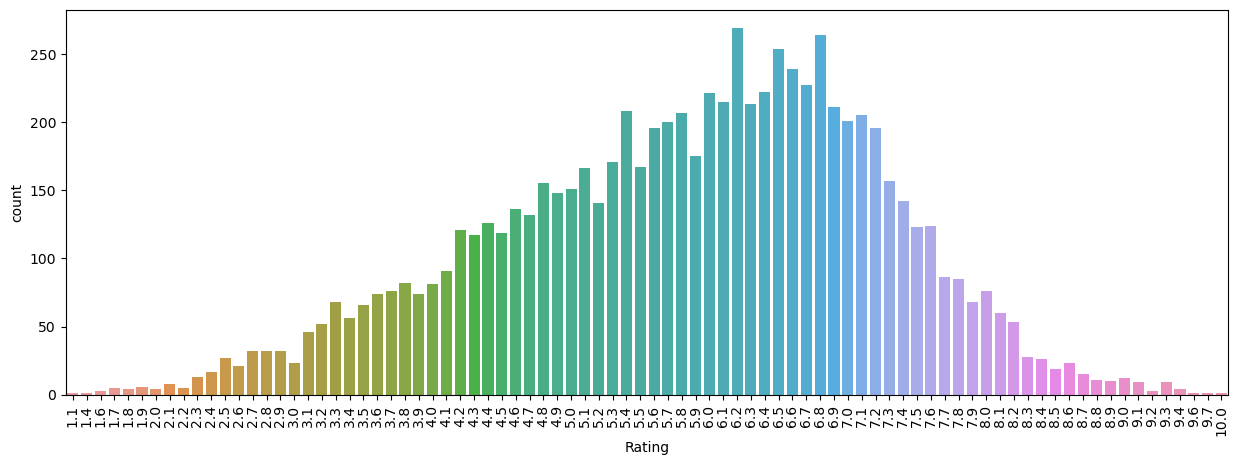

In [56]:
# Visualization graph of rating
plt.figure(figsize=(15,5))
sns.countplot(df, x= 'Rating')
plt.xticks(rotation=90)
plt.show()

In [57]:
# Import necessary libraries for LabelEncoder
from sklearn.preprocessing import LabelEncoder

# transforming the values of different columns of dataset
le = LabelEncoder()

df['Name'] = le.fit_transform(df['Name'].values)
df['Rating']=le.fit_transform(df['Rating'].values)
df['Director']=le.fit_transform(df['Director'].values)
df['Gen']=le.fit_transform(df['Gen'].values)
df['Actor 1']=le.fit_transform(df['Actor 1'].values)
df['Actor 2']=le.fit_transform(df['Actor 2'].values)
df['Actor 3']=le.fit_transform(df['Actor 3'].values)
df['Duration'] = le.fit_transform(df['Duration'].values)
df['Votes'] = le.fit_transform(df['Votes'].values)

In [58]:
# droping least valueable columns from the dataset
waste = ['Name', 'Votes', 'Year']
df.drop(waste, inplace=True, axis=1)
df.head()

,Duration,Gen,Rating,Director,Actor 1,Actor 2,Actor 3
0,182,299,84,1926,2250,800,3108
1,9,299,56,1548,3280,4790,527
2,172,351,84,5123,3713,2866,3450
3,10,228,30,3319,2917,1504,4020
4,5,299,84,385,3112,3462,405


In [59]:
df.dropna()

,Duration,Gen,Rating,Director,Actor 1,Actor 2,Actor 3
0,182,299,84,1926,2250,800,3108
1,9,299,56,1548,3280,4790,527
2,172,351,84,5123,3713,2866,3450
3,10,228,30,3319,2917,1504,4020
4,5,299,84,385,3112,3462,405
...,...,...,...,...,...,...,...
15504,182,0,32,2690,2586,4299,4262
15505,29,40,31,2499,227,4532,519
15506,182,0,84,2424,3609,4891,4820
15507,182,0,84,5938,4718,4891,4820


In [60]:
# Import necessary libraries for training and testing data
from sklearn.model_selection import train_test_split

# splitng dataset for taining model and predict the target variable
X = df.drop('Rating', axis=1).values
y = df['Rating'].values
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

In [61]:
# Import necessary libraries for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# fiting model on data and predicting the target variable
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy * 100: .2f}')

Accuracy :  36.60


In [62]:
# Import necessary libraries for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# fiting model on data and predicting the target variable
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

Accuracy: 38.70


In [63]:
# Import necessary libraries for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# fiting model on data and predicting the target variable
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred, squared=False)
rmse = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_score)

Mean Absolute Error (MAE): 17.817931033569018
Root Mean Squared Error (RMSE): 13.038333059085135
R-squared (R2): 0.3513576034708885


In [65]:
# Import necessary libraries for SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# fiting model on data and predicting the target variable
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred, squared=False)
rmse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 20.951333371181235
Root Mean Squared Error (RMSE): 16.739188431522997
R-squared (R2): 0.10316175755666046
